In [1]:
# Import dependencies
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import seaborn as sns

## Load and Prepare Dataset

In [2]:
# Variable to hold MNIST dataset 
mnist = tf.keras.datasets.mnist 

In [3]:
# Load the dataset into training and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# Normalize image pixel value from [0, 255] to [0, 1]; split into train, validation, and test sets
x_train, x_test = x_train / 255.0, x_test / 255.0 

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

x_train, x_val, y_train, y_val = train_test_split(
	x_train, y_train, test_size = 1/6, random_state=42)

In [5]:
# Check each array shape
print('x_train.shape =', x_train.shape)
print('y_train.shape =', y_train.shape)
print('x_val.shape =', x_val.shape)
print('y_val.shape =', y_val.shape)
print('x_test.shape =', x_test.shape)
print('y_test.shape =', y_test.shape)

x_train.shape = (50000, 28, 28, 1)
y_train.shape = (50000,)
x_val.shape = (10000, 28, 28, 1)
y_val.shape = (10000,)
x_test.shape = (10000, 28, 28, 1)
y_test.shape = (10000,)


## Build the Models

In [6]:
# Building the DNN Model with a Dropout Layer (2 Dense Layers)
dnnd = tf.keras.models.Sequential() 
# Add the Flatten Layer
dnnd.add(tf.keras.layers.Flatten()) 

# Add 2 hidden neuron Dense layers
dnnd.add(tf.keras.layers.Dense(units=400, activation="relu")) 
dnnd.add(tf.keras.layers.Dense(units=100, activation="relu"))

# Add a dropout layer
dnnd.add(tf.keras.layers.Dropout(0.25))
# Add the output layer
dnnd.add(tf.keras.layers.Dense(units=10, activation="softmax"))

# Compile the model
dnnd.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


2023-01-19 18:57:10.894369: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
# Building a CNN model (1 Dense Layer)
cnn = tf.keras.models.Sequential() 

# Add the 1st Convolutional Layer
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', 
                  activation ='relu', input_shape = (28,28,1)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
# Add the 2nd Convolutional Layer
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', 
                  activation ='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

# Add the Flatten Layer
cnn.add(tf.keras.layers.Flatten())

# Add 1 hidden neuron Dense Layer
cnn.add(tf.keras.layers.Dense(units=400, activation="relu"))

# Add a Dropout Layer
cnn.add(tf.keras.layers.Dropout(0.25))
# Add the Output Layer
cnn.add(tf.keras.layers.Dense(units=10, activation="softmax"))

cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [8]:
# Building a Deep CNN model (1 Dense Layer)
dcnn = tf.keras.models.Sequential() 

# Add the 1st Deep Convolutional Layer
dcnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', 
                  activation ='relu', input_shape = (28,28,1)))
dcnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', 
                  activation ='relu'))
dcnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
# Add the Dropout Layer
dcnn.add(tf.keras.layers.Dropout(0.25))

# Add the 2nd Deep Convolutional Layer
dcnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', 
                  activation ='relu'))
dcnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', 
                  activation ='relu'))
dcnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

# Add the Flatten Layer
dcnn.add(tf.keras.layers.Flatten())

# Add 1 Dense Layer
dcnn.add(tf.keras.layers.Dense(units=400, activation="relu"))
# Add a Dropout Layer
dcnn.add(tf.keras.layers.Dropout(0.25))

# Add the Output Layer
dcnn.add(tf.keras.layers.Dense(units=10, activation="softmax"))

# Compile the model
dcnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


## Train the Models

In [9]:
# Train the models
epochs = 20
batch_size = 32


print("Model: Deep Neural Network Model with a Dropout Layer (DNND) ----------------------------------------------")
dnnd_history = dnnd.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=2)

print("Model: Convolutional Neural Network Model (CNN) -----------------------------------------------------------")
cnn_history = cnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=2)

print("Model: Deep Convolutional Neural Network Model (DCNN) -----------------------------------------------------")
dcnn_history = dcnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=2)


Model: Deep Neural Network Model with a Dropout Layer (DNND) ----------------------------------------------


2023-01-19 18:57:11.708882: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
1563/1563 - 13s - loss: 0.2526 - accuracy: 0.9232 - val_loss: 0.1128 - val_accuracy: 0.9663
Epoch 2/20
1563/1563 - 14s - loss: 0.1034 - accuracy: 0.9693 - val_loss: 0.0867 - val_accuracy: 0.9745
Epoch 3/20
1563/1563 - 14s - loss: 0.0718 - accuracy: 0.9778 - val_loss: 0.0790 - val_accuracy: 0.9752
Epoch 4/20
1563/1563 - 15s - loss: 0.0537 - accuracy: 0.9833 - val_loss: 0.0733 - val_accuracy: 0.9792
Epoch 5/20
1563/1563 - 12s - loss: 0.0418 - accuracy: 0.9865 - val_loss: 0.0932 - val_accuracy: 0.9766
Epoch 6/20
1563/1563 - 10s - loss: 0.0360 - accuracy: 0.9884 - val_loss: 0.0856 - val_accuracy: 0.9765
Epoch 7/20
1563/1563 - 13s - loss: 0.0298 - accuracy: 0.9906 - val_loss: 0.0874 - val_accuracy: 0.9755
Epoch 8/20
1563/1563 - 18s - loss: 0.0265 - accuracy: 0.9913 - val_loss: 0.0797 - val_accuracy: 0.9807
Epoch 9/20
1563/1563 - 17s - loss: 0.0220 - accuracy: 0.9926 - val_loss: 0.0950 - val_accuracy: 0.9788
Epoch 10/20
1563/1563 - 20s - loss: 0.0225 - accuracy: 0.9926 - val_loss:

## Plot Accuracies for each Model

In [10]:
# Summarize the model
dnnd.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               40100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________


313/313 [==============================] - 1s 3ms/step - loss: 0.1120 - accuracy: 0.9803


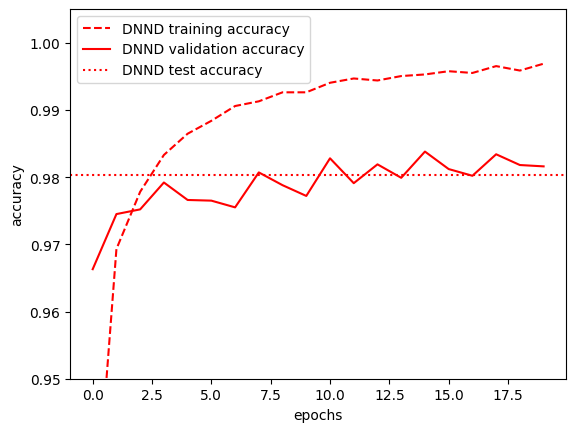

In [11]:
# Plot training and validation accuracies for the models
dnnd_test_loss, dnnd_test_acc = dnnd.evaluate(x_test, y_test)

plt.plot(dnnd_history.history["accuracy"], "r--",label="DNND training accuracy")
plt.plot(dnnd_history.history["val_accuracy"], "r-",label="DNND validation accuracy")
plt.axhline(dnnd_test_acc,color="r", linestyle=":", label="DNND test accuracy")

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.95, 1.005)
plt.legend()

In [12]:
# Summarize the model
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               627600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)              

In [13]:
# Summarize the model
dcnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)         

313/313 [==============================] - 13s 40ms/step - loss: 0.0324 - accuracy: 0.9934


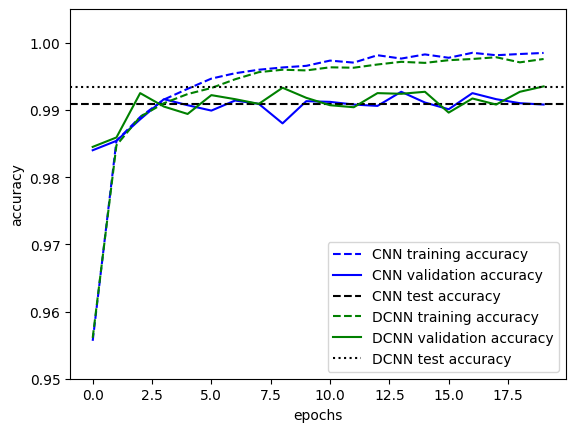

In [14]:
# Plot training and validation accuracies for the models
cnn_test_loss, cnn_test_acc = cnn.evaluate(x_test, y_test)
dcnn_test_loss, dcnn_test_acc = dcnn.evaluate(x_test, y_test)

plt.plot(cnn_history.history["accuracy"], "b--",label="CNN training accuracy")
plt.plot(cnn_history.history["val_accuracy"], "b-",label="CNN validation accuracy")
plt.axhline(cnn_test_acc,color="k", linestyle="--", label="CNN test accuracy")

plt.plot(dcnn_history.history["accuracy"], "g--",label="DCNN training accuracy")
plt.plot(dcnn_history.history["val_accuracy"], "g-",label="DCNN validation accuracy")
plt.axhline(dcnn_test_acc,color="k", linestyle=":", label="DCNN test accuracy")

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.95, 1.005)
plt.legend()

## Plot Accuracy and Loss for each Model

In [15]:
def metrics_plot(metrics, history):
  f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
  for idx, metric in enumerate(metrics):
    ax[idx].plot(history.history[metric])
    ax[idx].set_xlabel("Epochs")
    ax[idx].set_ylabel(metric)
    ax[idx].plot(history.history['val_' + metric]);
    ax[idx].legend([metric, 'val_' + metric])

Model: Deep Neural Network Model with a Dropout Layer (DNND)


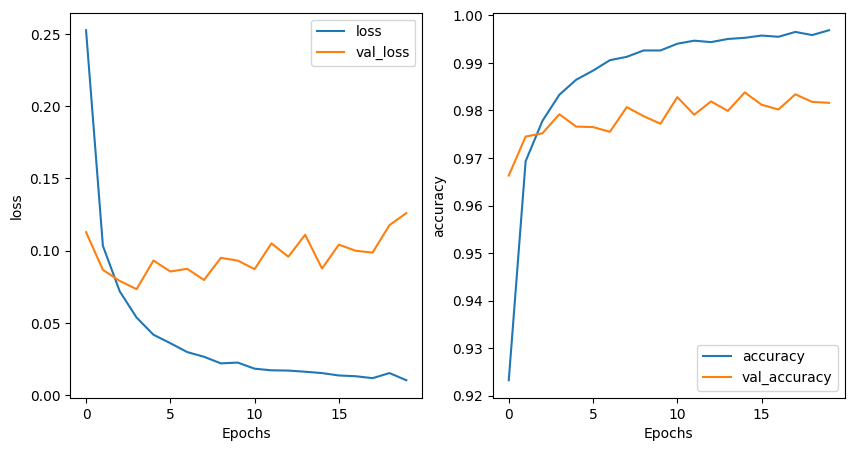

In [16]:
print("Model: Deep Neural Network Model with a Dropout Layer (DNND)")
metrics_plot(['loss', 'accuracy'], dnnd_history)

Model: Convolutional Neural Network Model (CNN)


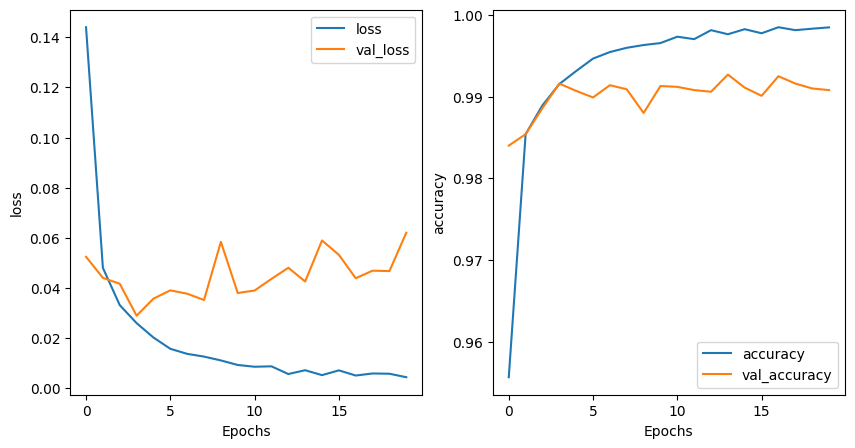

In [17]:
print("Model: Convolutional Neural Network Model (CNN)")
metrics_plot(['loss', 'accuracy'], cnn_history)

Model: Deep Convolutional Neural Network Model (DCNN)


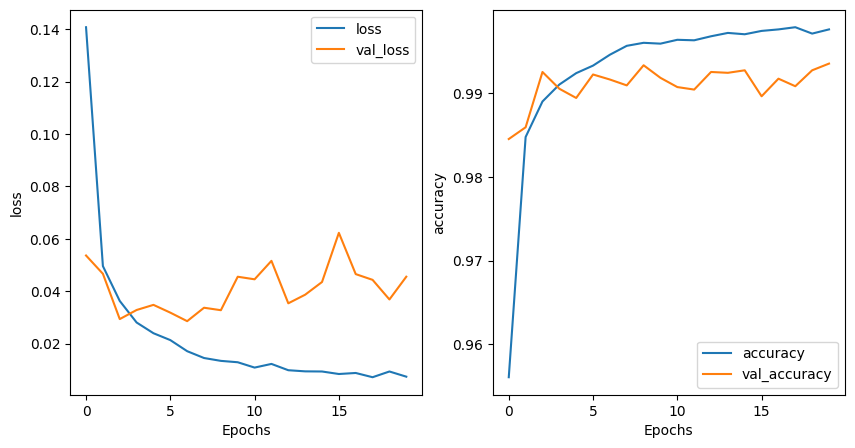

In [18]:
print("Model: Deep Convolutional Neural Network Model (DCNN)")
metrics_plot(['loss', 'accuracy'], dcnn_history)

## Get Predictions

Model: Deep Neural Network with Dropout Layer (DNND)
Precision score is: 0.9803890083838953
Recall score is: 0.9803


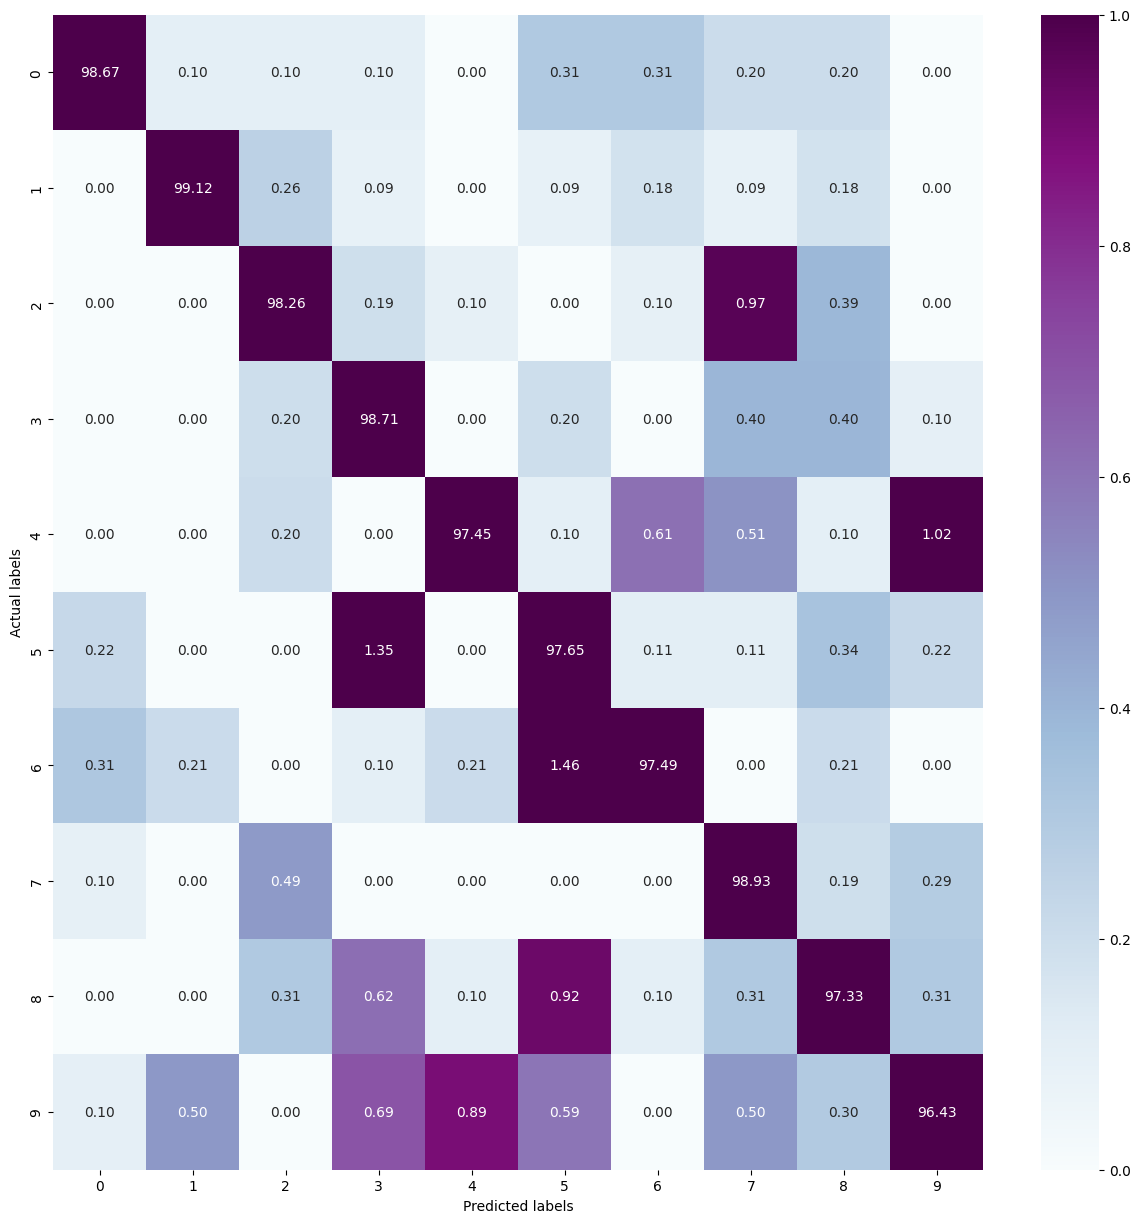

In [19]:
# Get predictions using the Deep Neural Network with Dropout Layer (DNND)
print ("Model: Deep Neural Network with Dropout Layer (DNND)")

# Generate predictions on unseen test set.
predictions_dnnd = dnnd.predict(x_test)
y_pred_dnnd = np.argmax(predictions_dnnd, axis=1)

# Calculate precision and recall scores 
p = precision_score(y_test, y_pred_dnnd , average="weighted")
print(f"Precision score is: {p}")
r = recall_score(y_test, y_pred_dnnd , average="weighted")
print(f"Recall score is: {r}")

# Confusion Matrix
label_names=['0','1','2','3','4','5','6','7','8','9']
cm =confusion_matrix(y_test, y_pred_dnnd)
CM = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
CM = CM * 100
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(CM, annot=True, fmt='.2f', xticklabels=label_names, yticklabels=label_names, cmap="BuPu", vmin=0.0, vmax=1.0)
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show(block=False)

Model: Convolutional Neural Network (CNN)
Precision score is: 0.9909335467901598
Recall score is: 0.9909


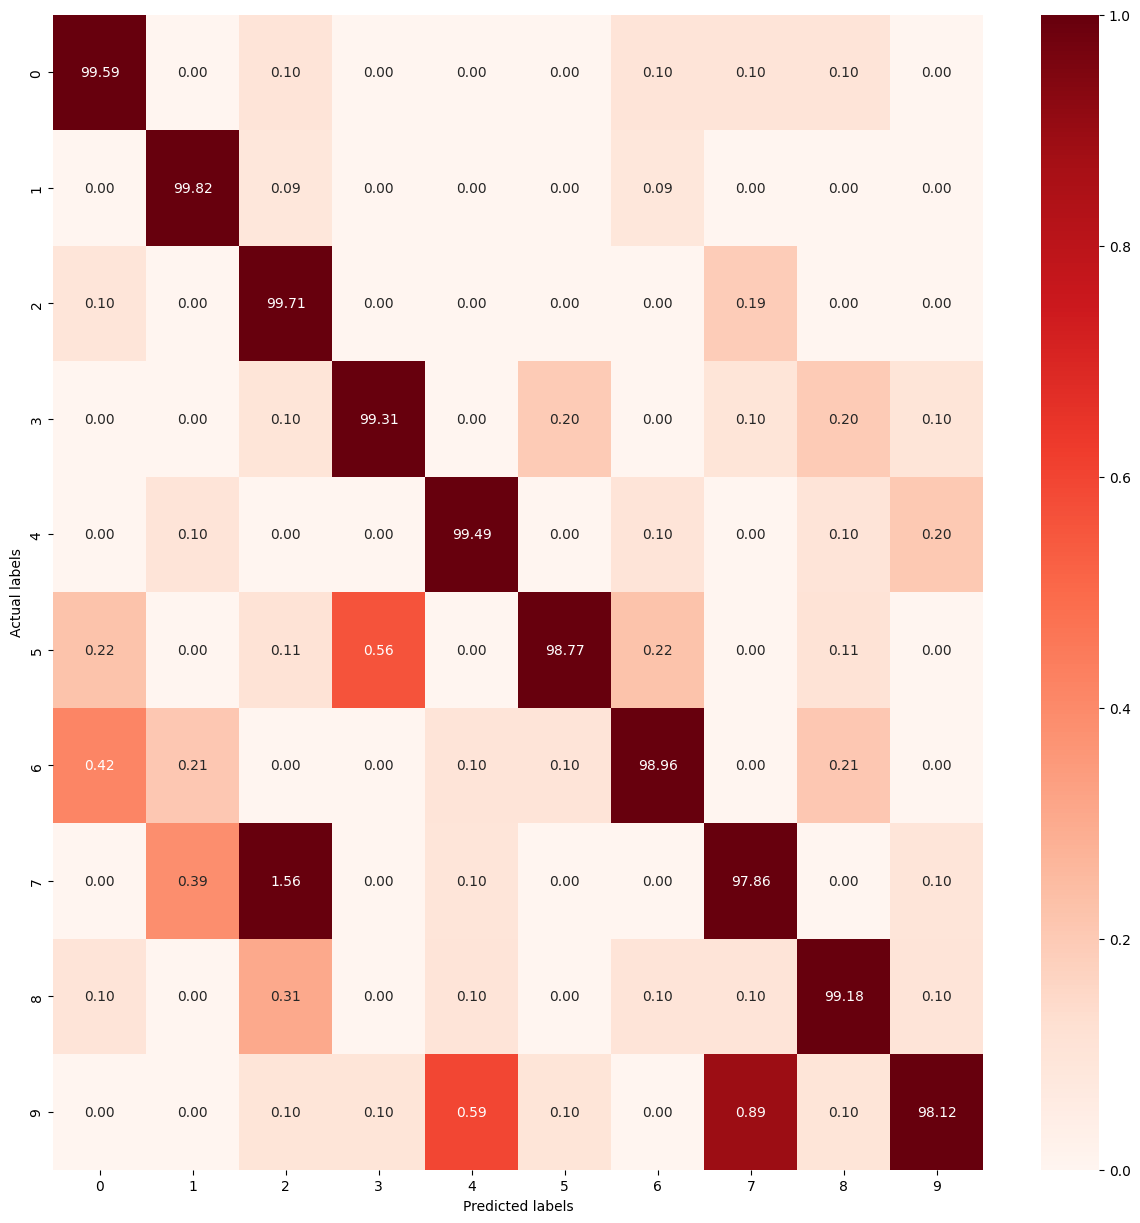

In [20]:
# Get predictions using the Convolutional Neural Network (CNN)
print ("Model: Convolutional Neural Network (CNN)")

# Generate predictions on unseen test set.
predictions_cnn = cnn.predict(x_test)
y_pred_cnn = np.argmax(predictions_cnn, axis=1)

# Calculate precision and recall scores 
p = precision_score(y_test, y_pred_cnn , average="weighted")
print(f"Precision score is: {p}")
r = recall_score(y_test, y_pred_cnn , average="weighted")
print(f"Recall score is: {r}")

# Confusion Matrix
label_names=['0','1','2','3','4','5','6','7','8','9']
cm =confusion_matrix(y_test, y_pred_cnn)
CM = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
CM = CM * 100
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(CM, annot=True, fmt='.2f', xticklabels=label_names, yticklabels=label_names, cmap="Reds", vmin=0.0, vmax=1.0)
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show(block=False)

Model: Deep Convolutional Neural Network (DCNN)
Precision score is: 0.993412860643631
Recall score is: 0.9934


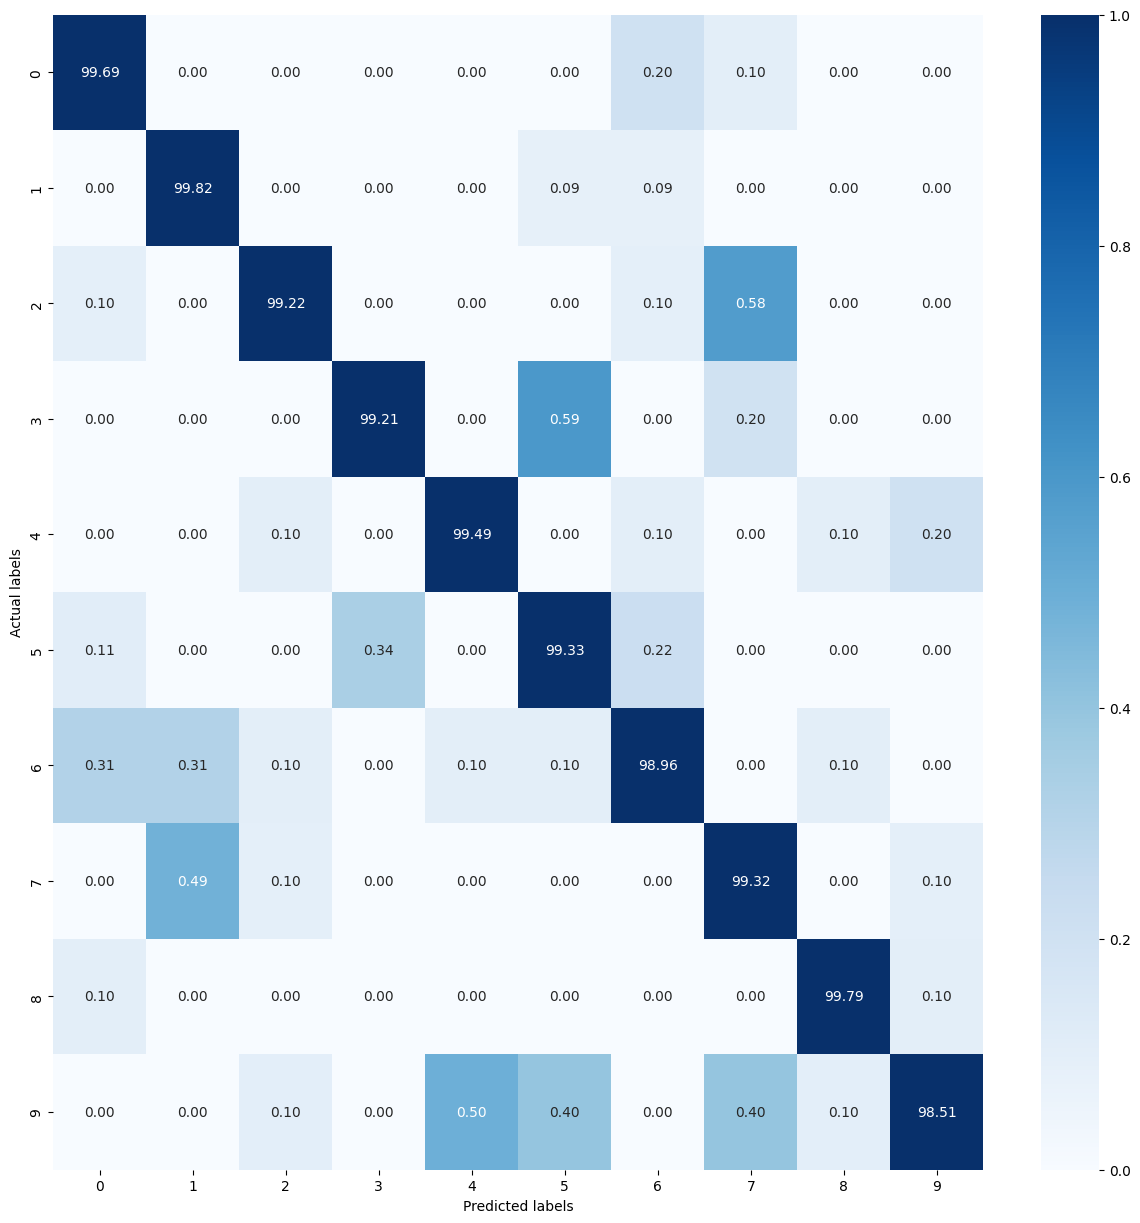

In [21]:
# Get predictions using the Deep Convolutional Neural Network (DCNN)
print ("Model: Deep Convolutional Neural Network (DCNN)")

# Generate predictions on unseen test set.
predictions_dcnn = dcnn.predict(x_test)
y_pred_dcnn = np.argmax(predictions_dcnn, axis=1)

# Calculate precision and recall scores 
p = precision_score(y_test, y_pred_dcnn , average="weighted")
print(f"Precision score is: {p}")
r = recall_score(y_test, y_pred_dcnn , average="weighted")
print(f"Recall score is: {r}")

# Confusion Matrix
label_names=['0','1','2','3','4','5','6','7','8','9']
cm =confusion_matrix(y_test, y_pred_dcnn)
CM = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
CM = CM * 100
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(CM, annot=True, fmt='.2f', xticklabels=label_names, yticklabels=label_names, cmap="Blues", vmin=0.0, vmax=1.0)
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show(block=False)

## Make an Example Prediction

Actual Digit :


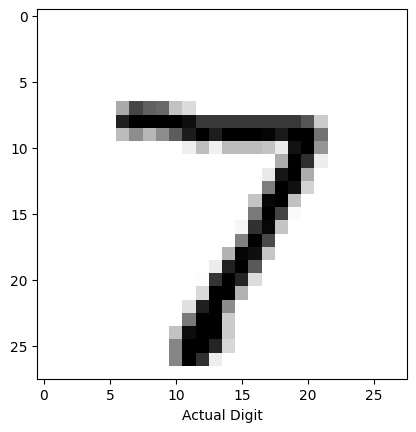

Predicted Digit :  7


In [22]:
# Example prediction
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.xlabel('Actual Digit')
print("Actual Digit :")
plt.show()
print("Predicted Digit : ", y_pred_dcnn[0])